In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#DATOS OBTENIDOS DE UN PDF DEL MINISTERIO DE TRANSPORTES "chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://cdn.mitma.gob.es/portal-web-drupal/estadistica_tt/webturi.pdf"

diccionario = { 'Comunidades y Ciudades Autónomas' : ['Ceuta', 'Melilla', 'Extremadura', 'Canarias', 'Andalucía', 'Murcia, Región de','Castilla - La Mancha', 'Comunitat Valenciana', 'Asturias, Principado de', 'Galicia', 'Castilla y León', 'Balears, Illes', 'Rioja, La', 'Aragón', 'Cantabria', 'Madrid, Comunidad de', 'Cataluña', 'País Vasco', 'Navarra, Comunidad Foral de'],
                'Taxis' : [0, 0,857, 2218, 8770,748,1083,4699, 1375,3450, 2252, 2529, 154,2087, 455,15209, 12147,2029, 425 ],
                'VTC' : [0, 2, 130,0,3594,95, 207,789, 122, 201, 269, 744, 49, 197,115, 8866, 2977,163, 97 ]
              }

In [5]:
df = pd.DataFrame(diccionario)
df

,Comunidades y Ciudades Autónomas,Taxis,VTC
0,Ceuta,0,0
1,Melilla,0,2
2,Extremadura,857,130
3,Canarias,2218,0
4,Andalucía,8770,3594
5,"Murcia, Región de",748,95
6,Castilla - La Mancha,1083,207
7,Comunitat Valenciana,4699,789
8,"Asturias, Principado de",1375,122
9,Galicia,3450,201


In [6]:
df=df.sort_values('Taxis', ascending=False)

In [20]:
df.to_csv('taxis_vtc_comunidad.csv',index=False)

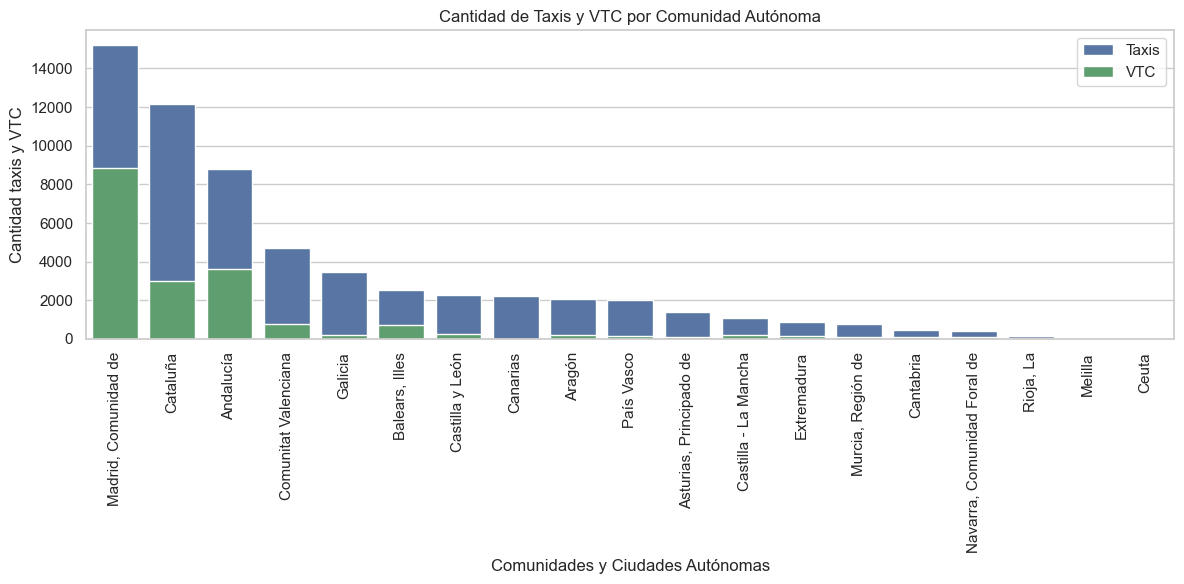

In [19]:

plt.figure(figsize=(12, 6))  
ax = sns.barplot(x='Comunidades y Ciudades Autónomas', y='Taxis', data=df, color='b', label='Taxis')
sns.barplot(x='Comunidades y Ciudades Autónomas', y='VTC', data=df, color='g', label='VTC')
plt.xlabel('Comunidades y Ciudades Autónomas')
plt.ylabel('Cantidad taxis y VTC')
plt.title('Cantidad de Taxis y VTC por Comunidad Autónoma')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.savefig('taxis.jpg', bbox_inches='tight')
plt.show()

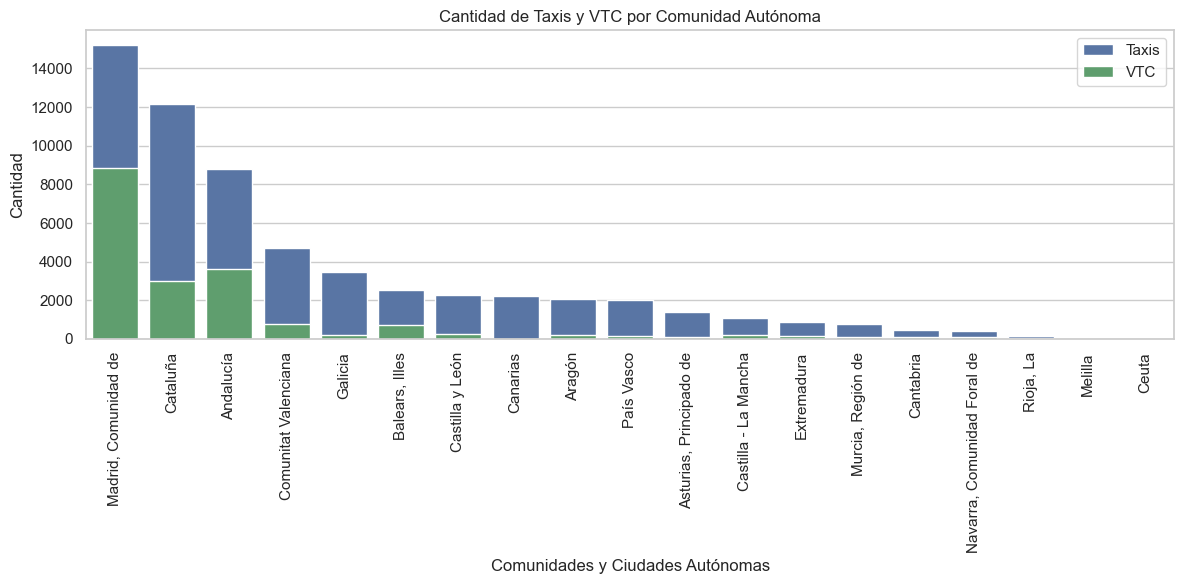

In [13]:
sns.set(style="whitegrid")

# Crear un gráfico de barras apiladas
plt.figure(figsize=(12, 6))  # Ajusta el tamaño del gráfico

ax = sns.barplot(x='Comunidades y Ciudades Autónomas', y='Taxis', data=df, color='b', label='Taxis')
sns.barplot(x='Comunidades y Ciudades Autónomas', y='VTC', data=df, color='g', label='VTC', ax=ax)

plt.xlabel('Comunidades y Ciudades Autónomas')
plt.ylabel('Cantidad')
plt.title('Cantidad de Taxis y VTC por Comunidad Autónoma')
plt.xticks(rotation=90)
plt.legend()

plt.tight_layout()  # Ajusta el diseño del gráfico para que las etiquetas sean visibles
plt.show()

In [21]:
df_2 =  pd.read_csv("poblacion.csv")
df_2

,Comunidades y Ciudades Autónomas,Poblacion total
0,Andalucía,8464411
1,Cataluña,7780479
2,"Madrid, Comunidad de",6779888
3,Comunitat Valenciana,5057353
4,Galicia,2701819
5,Castilla y León,2394918
6,País Vasco,2220504
7,Canarias,2175952
8,Castilla - La Mancha,2045221
9,"Murcia, Región de",1511251


In [40]:
merged_df = pd.merge(df, df_2, on='Comunidades y Ciudades Autónomas', how='inner')

In [41]:
merged_df

,Comunidades y Ciudades Autónomas,Taxis,VTC,Poblacion total
0,"Madrid, Comunidad de",15209,8866,6779888
1,Cataluña,12147,2977,7780479
2,Andalucía,8770,3594,8464411
3,Comunitat Valenciana,4699,789,5057353
4,Galicia,3450,201,2701819
5,"Balears, Illes",2529,744,1171543
6,Castilla y León,2252,269,2394918
7,Canarias,2218,0,2175952
8,Aragón,2087,197,1329391
9,País Vasco,2029,163,2220504


In [46]:
merged_df.loc[18, 'VTC'] = 1

In [47]:
merged_df['total'] =  merged_df['VTC'] + merged_df['Taxis']
merged_df['Taxis por persona'] =  merged_df['Poblacion total'] / merged_df['total']
merged_df['Taxis por persona'] = merged_df['Taxis por persona'].round(2)
merged_df.loc[18, 'VTC'] = 1

In [49]:
merged_df = merged_df.sort_values(by='Taxis por persona', ascending=True)

In [51]:
merged_df.to_csv('taxis_vtc_comunidad.csv',index=False)

In [52]:
merged_df

,Comunidades y Ciudades Autónomas,Taxis,VTC,Poblacion total,total,Taxis por persona
0,"Madrid, Comunidad de",15209,8866,6779888,24075,281.62
5,"Balears, Illes",2529,744,1171543,3273,357.94
1,Cataluña,12147,2977,7780479,15124,514.45
8,Aragón,2087,197,1329391,2284,582.05
10,"Asturias, Principado de",1375,122,1018784,1497,680.55
2,Andalucía,8770,3594,8464411,12364,684.60
4,Galicia,3450,201,2701819,3651,740.02
3,Comunitat Valenciana,4699,789,5057353,5488,921.53
6,Castilla y León,2252,269,2394918,2521,949.99
7,Canarias,2218,0,2175952,2218,981.04


In [53]:

merged_df = merged_df.drop(columns=['Taxis','VTC', 'Poblacion total','total','Taxis por persona' ])
merged_df = merged_df.iloc[::-1].reset_index(drop=True)
merged_df.index = range(1, 20)
merged_df['Puntuacion_Taxis'] = merged_df.index
merged_df.index = range(1, 20)

In [55]:
merged_df.to_csv('Puntuacion_taxis.csv',index=False)